# **Código para pruebas de estabilidad de métricas**

Compara el desempeño de la media y la mediana contra la métrica desarrollada en *defs.py* & *defs2.py*, así como contra sí mismas para un diagnóstico de mejoras de *defs.py*, mediante una simulación de 10,000 distribuciones diferentes, generadas aleatoriamente (función de generación aleatoria ubicada en **funciones_aux.py**)

In [4]:
# Bloque 0: imports y setup
import numpy as np
import pandas as pd
from tqdm import tqdm
import defs
import defs2
import funciones_aux
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon
from funciones_aux import (
    eval_one_sim, bowley_skew, excess_kurtosis, 
    run_resumenes, run_tests, victorias_grouped, 
    columnas_comparacion_default
)

RANDOM_SEED = 123
rng = np.random.default_rng(RANDOM_SEED)

In [5]:
# Bloque 3: loop principal de simulación (1000)

S = 10000
rows = []
for s in tqdm(range(1, S+1)):
    rows.append(eval_one_sim(s, rng))

df_ab = pd.DataFrame(rows)

print("✅ Simulaciones completadas:", len(df_ab))
print("Columnas:", list(df_ab.columns))
df_ab.head()

# Bloque 4: Resumen de victorias para recorte unilateral
comparisons_left = [
    ("d_mp1_vs_mean_left",   "V1 vs Media (izq)"),
    ("d_mp2_vs_mean_left",   "V2 vs Media (izq)"),
    ("d_mp1_vs_median_left", "V1 vs Mediana (izq)"),
    ("d_mp2_vs_median_left", "V2 vs Mediana (izq)"),
    ("d_v2_vs_v1_left",      "V2 vs V1 (izq)")
]
comparisons_right = [
    ("d_mp1_vs_mean_right",   "V1 vs Media (der)"),
    ("d_mp2_vs_mean_right",   "V2 vs Media (der)"),
    ("d_mp1_vs_median_right", "V1 vs Mediana (der)"),
    ("d_mp2_vs_median_right", "V2 vs Mediana (der)"),
    ("d_v2_vs_v1_right",      "V2 vs V1 (der)")
]

# Resumen global de victorias (proporciones y diferencias promedio)
df_resumenes_left = run_resumenes(df_ab, comparisons_left, threshold=0.0)
df_resumenes_right = run_resumenes(df_ab, comparisons_right, threshold=0.0)
print("--- Resumen de recorte izquierda ---")
display(df_resumenes_left)
print("\n--- Resumen de recorte derecha ---")
display(df_resumenes_right)


100%|██████████| 10000/10000 [2:57:14<00:00,  1.06s/it] 


✅ Simulaciones completadas: 10000
Columnas: ['sim_id', 'familia', 'n', 'rango_n', 'tuvo_outliers', 'n_outliers', 'skewness', 'kurtosis', 'mean_full', 'median_full', 'mp1_full', 'mp2_full', 'mean_left', 'median_left', 'mp1_left', 'mp2_left', 'mean_right', 'median_right', 'mp1_right', 'mp2_right', 'delta_mean_left', 'delta_median_left', 'delta_mp1_left', 'delta_mp2_left', 'delta_mean_right', 'delta_median_right', 'delta_mp1_right', 'delta_mp2_right', 'd_mp1_vs_mean_left', 'd_mp2_vs_mean_left', 'd_mp1_vs_median_left', 'd_mp2_vs_median_left', 'd_v2_vs_v1_left', 'd_mp1_vs_mean_right', 'd_mp2_vs_mean_right', 'd_mp1_vs_median_right', 'd_mp2_vs_median_right', 'd_v2_vs_v1_right', 'params']
--- Resumen de recorte izquierda ---


,comparacion,proporcion,casos_gana,total,media_diff,mediana_diff
0,V1 vs Media (izq),0.8218,8218,10000,0.096069,4.018932e-02
1,V2 vs Media (izq),0.8148,8148,10000,0.095631,3.982737e-02
2,V1 vs Mediana (izq),0.2708,2708,10000,-0.036474,-1.811690e-02
3,V2 vs Mediana (izq),0.2490,2490,10000,-0.036913,-1.999375e-02
4,V2 vs V1 (izq),0.3210,3210,10000,-0.000438,-3.552714e-15



--- Resumen de recorte derecha ---


,comparacion,proporcion,casos_gana,total,media_diff,mediana_diff
0,V1 vs Media (der),0.8566,8566,10000,0.130337,0.070914
1,V2 vs Media (der),0.8501,8501,10000,0.133719,0.069668
2,V1 vs Mediana (der),0.2480,2480,10000,-0.049046,-0.030003
3,V2 vs Mediana (der),0.2356,2356,10000,-0.045664,-0.030014
4,V2 vs V1 (der),0.3723,3723,10000,0.003382,0.000000


In [6]:
# Bloque 4: Resumen de victorias por subgrupos para recorte unilateral
cols_diffs_left = ["d_mp1_vs_mean_left", "d_mp2_vs_mean_left", "d_v2_vs_v1_left"]
cols_diffs_right = ["d_mp1_vs_mean_right", "d_mp2_vs_mean_right", "d_v2_vs_v1_right"]

victorias_familia_left   = victorias_grouped(df_ab, "familia",       cols_diffs_left, threshold=0.0)
victorias_familia_right  = victorias_grouped(df_ab, "familia",       cols_diffs_right, threshold=0.0)
victorias_outliers_left  = victorias_grouped(df_ab, "tuvo_outliers", cols_diffs_left, threshold=0.0)
victorias_outliers_right = victorias_grouped(df_ab, "tuvo_outliers", cols_diffs_right, threshold=0.0)
victorias_rango_n_left   = victorias_grouped(df_ab, "rango_n",       cols_diffs_left, threshold=0.0)
victorias_rango_n_right  = victorias_grouped(df_ab, "rango_n",       cols_diffs_right, threshold=0.0)

print("--- Proporción de victorias por familia (izquierda) ---")
display(victorias_familia_left)
print("\n--- Proporción de victorias por familia (derecha) ---")
display(victorias_familia_right)

print("\n--- Proporción de victorias por outliers (izquierda) ---")
display(victorias_outliers_left)
print("\n--- Proporción de victorias por outliers (derecha) ---")
display(victorias_outliers_right)

print("\n--- Proporción de victorias por rango_n (izquierda) ---")
display(victorias_rango_n_left)
print("\n--- Proporción de victorias por rango_n (derecha) ---")
display(victorias_rango_n_right)


--- Proporción de victorias por familia (izquierda) ---


,familia,d_mp1_vs_mean_left,d_mp2_vs_mean_left,d_v2_vs_v1_left
0,beta,0.793366,0.768487,0.378023
1,gamma,0.800964,0.809917,0.250000
2,lognormal,0.817927,0.819328,0.286415
3,mixtura_bimodal,0.819310,0.811034,0.282069
4,normal,0.901651,0.902338,0.337689
5,t_student,0.941512,0.930813,0.348787
6,uniforme,0.673007,0.656181,0.367228



--- Proporción de victorias por familia (derecha) ---


,familia,d_mp1_vs_mean_right,d_mp2_vs_mean_right,d_v2_vs_v1_right
0,beta,0.769869,0.760194,0.366966
1,gamma,0.935262,0.924242,0.371212
2,lognormal,0.974790,0.972689,0.439076
3,mixtura_bimodal,0.811724,0.806207,0.306897
4,normal,0.899587,0.890646,0.365887
5,t_student,0.942939,0.935806,0.366619
6,uniforme,0.654718,0.653987,0.391368



--- Proporción de victorias por outliers (izquierda) ---


,tuvo_outliers,d_mp1_vs_mean_left,d_mp2_vs_mean_left,d_v2_vs_v1_left
0,False,0.772637,0.764547,0.308260
1,True,0.939066,0.934665,0.351388



--- Proporción de victorias por outliers (derecha) ---


,tuvo_outliers,d_mp1_vs_mean_right,d_mp2_vs_mean_right,d_v2_vs_v1_right
0,False,0.815356,0.807125,0.361766
1,True,0.954976,0.952607,0.397427



--- Proporción de victorias por rango_n (izquierda) ---


,rango_n,d_mp1_vs_mean_left,d_mp2_vs_mean_left,d_v2_vs_v1_left
0,grande,0.888823,0.881094,0.309750
1,mediano,0.837756,0.828709,0.371834
2,pequeño,0.737952,0.733735,0.281627



--- Proporción de victorias por rango_n (derecha) ---


,rango_n,d_mp1_vs_mean_right,d_mp2_vs_mean_right,d_v2_vs_v1_right
0,grande,0.912604,0.903983,0.347800
1,mediano,0.862183,0.856152,0.444210
2,pequeño,0.794277,0.789458,0.325301


In [7]:
# Tests estadísticos (Wilcoxon unilateral) para recorte unilateral

# Definir las columnas de diferencia V1 vs V2 para ambos recortes
df_ab["d_v1_vs_v2_left"] = df_ab["delta_mp1_left"] - df_ab["delta_mp2_left"]
df_ab["d_v1_vs_v2_right"] = df_ab["delta_mp1_right"] - df_ab["delta_mp2_right"]

comparisons_left = [
    ("d_mp1_vs_mean_left",   "V1 vs Media (izq)"),
    ("d_mp2_vs_mean_left",   "V2 vs Media (izq)"),
    ("d_mp1_vs_median_left", "V1 vs Mediana (izq)"),
    ("d_mp2_vs_median_left", "V2 vs Mediana (izq)"),
    ("d_v2_vs_v1_left",      "V2 vs V1 (izq)")
]

comparisons_right = [
    ("d_mp1_vs_mean_right",   "V1 vs Media (der)"),
    ("d_mp2_vs_mean_right",   "V2 vs Media (der)"),
    ("d_mp1_vs_median_right", "V1 vs Mediana (der)"),
    ("d_mp2_vs_median_right", "V2 vs Mediana (der)"),
    ("d_v2_vs_v1_right",      "V2 vs V1 (der)")
]

# Ejecutar los tests existentes
df_tests_left = run_tests(df_ab, comparisons_left, alternative="greater")
df_tests_right = run_tests(df_ab, comparisons_right, alternative="greater")

# Ejecutar la nueva prueba V1 vs V2 (Wilcoxon unilateral, alternativa 'greater')
comparisons_left_v1_vs_v2 = [("d_v1_vs_v2_left", "V1 vs V2 (izq)")]
comparisons_right_v1_vs_v2 = [("d_v1_vs_v2_right", "V1 vs V2 (der)")]

df_tests_left_v1_vs_v2 = run_tests(df_ab, comparisons_left_v1_vs_v2, alternative="greater")
df_tests_right_v1_vs_v2 = run_tests(df_ab, comparisons_right_v1_vs_v2, alternative="greater")

print("--- Tests Wilcoxon recorte izquierda ---")
display(df_tests_left)
print("\n--- Tests Wilcoxon recorte derecha ---")
display(df_tests_right)

print("\n--- Test Wilcoxon V1 vs V2 (izquierda) ---")
display(df_tests_left_v1_vs_v2)

print("\n--- Test Wilcoxon V1 vs V2 (derecha) ---")
display(df_tests_right_v1_vs_v2)

--- Tests Wilcoxon recorte izquierda ---


,comparacion,n,statistic,p_value,alternative
0,V1 vs Media (izq),10000,44363982.0,0.0,greater
1,V2 vs Media (izq),10000,43777043.0,0.0,greater
2,V1 vs Mediana (izq),10000,11196768.0,1.0,greater
3,V2 vs Mediana (izq),10000,10526275.0,1.0,greater
4,V2 vs V1 (izq),10000,15810045.5,1.0,greater



--- Tests Wilcoxon recorte derecha ---


,comparacion,n,statistic,p_value,alternative
0,V1 vs Media (der),10000,46172660.0,0.000000,greater
1,V2 vs Media (der),10000,45827047.0,0.000000,greater
2,V1 vs Mediana (der),10000,9580852.0,1.000000,greater
3,V2 vs Mediana (der),10000,9513150.0,1.000000,greater
4,V2 vs V1 (der),10000,18328457.5,0.478724,greater



--- Test Wilcoxon V1 vs V2 (izquierda) ---


,comparacion,n,statistic,p_value,alternative
0,V1 vs V2 (izq),10000,15810045.5,1.0,greater



--- Test Wilcoxon V1 vs V2 (derecha) ---


,comparacion,n,statistic,p_value,alternative
0,V1 vs V2 (der),10000,18328457.5,0.478724,greater


In [8]:
# Exportar los nuevos DataFrames de resultados y victorias

df_resumenes_left.to_csv("ab_resumenes_left.csv", index=False)
df_resumenes_right.to_csv("ab_resumenes_right.csv", index=False)
victorias_familia_left.to_csv("ab_victorias_por_familia_left.csv", index=False)
victorias_familia_right.to_csv("ab_victorias_por_familia_right.csv", index=False)
victorias_outliers_left.to_csv("ab_victorias_por_outliers_left.csv", index=False)
victorias_outliers_right.to_csv("ab_victorias_por_outliers_right.csv", index=False)
victorias_rango_n_left.to_csv("ab_victorias_por_rangon_left.csv", index=False)
victorias_rango_n_right.to_csv("ab_victorias_por_rangon_right.csv", index=False)
df_tests_left.to_csv("ab_tests_wilcoxon_left.csv", index=False)
df_tests_right.to_csv("ab_tests_wilcoxon_right.csv", index=False)
print("CSV exportados ✅")


CSV exportados ✅


### **Visualizaciones**

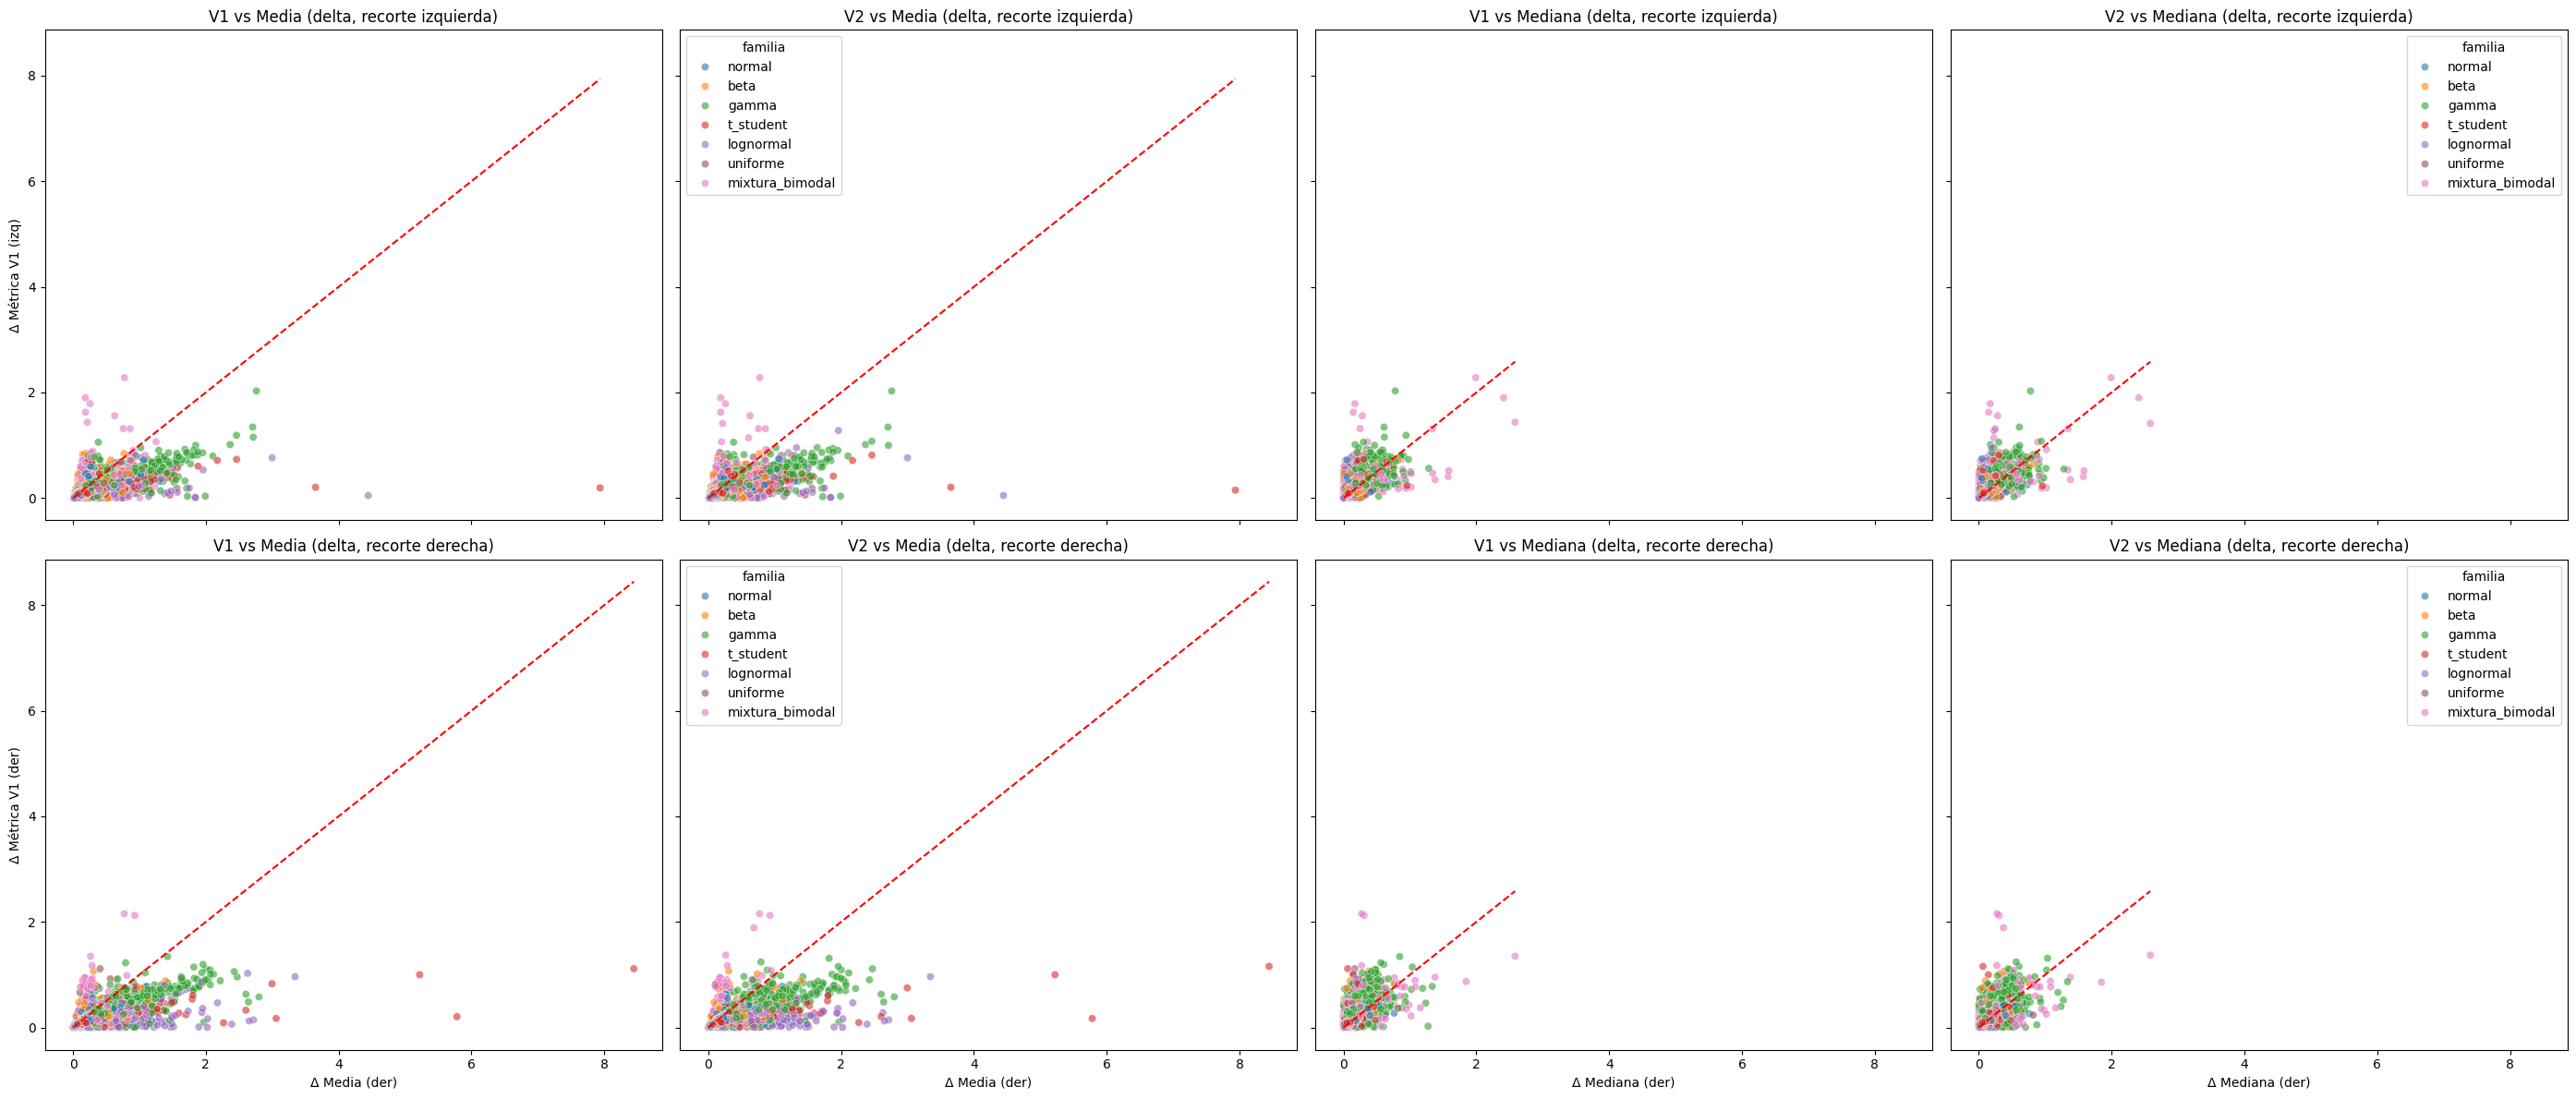

In [9]:
# --- 1. Dispersión: delta_mean vs delta_mp1 y delta_mp2, y delta_median vs delta_mp1 y delta_mp2 bajo recorte unilateral ---
fig, axes = plt.subplots(2, 4, figsize=(28, 12), sharex=True, sharey=True)

# Izquierda
sns.scatterplot(
    data=df_ab, x="delta_mean_left", y="delta_mp1_left",
    hue="familia", alpha=0.6, ax=axes[0,0], legend=False
)
axes[0,0].plot([0, df_ab[["delta_mean_left","delta_mp1_left"]].max().max()],
             [0, df_ab[["delta_mean_left","delta_mp1_left"]].max().max()],
             'r--')
axes[0,0].set_title("V1 vs Media (delta, recorte izquierda)")
axes[0,0].set_xlabel("Δ Media (izq)")
axes[0,0].set_ylabel("Δ Métrica V1 (izq)")

sns.scatterplot(
    data=df_ab, x="delta_mean_left", y="delta_mp2_left",
    hue="familia", alpha=0.6, ax=axes[0,1]
)
axes[0,1].plot([0, df_ab[["delta_mean_left","delta_mp2_left"]].max().max()],
             [0, df_ab[["delta_mean_left","delta_mp2_left"]].max().max()],
             'r--')
axes[0,1].set_title("V2 vs Media (delta, recorte izquierda)")
axes[0,1].set_xlabel("Δ Media (izq)")
axes[0,1].set_ylabel("Δ Métrica V2 (izq)")

sns.scatterplot(
    data=df_ab, x="delta_median_left", y="delta_mp1_left",
    hue="familia", alpha=0.6, ax=axes[0,2], legend=False
)
axes[0,2].plot([0, df_ab[["delta_median_left","delta_mp1_left"]].max().max()],
             [0, df_ab[["delta_median_left","delta_mp1_left"]].max().max()],
             'r--')
axes[0,2].set_title("V1 vs Mediana (delta, recorte izquierda)")
axes[0,2].set_xlabel("Δ Mediana (izq)")
axes[0,2].set_ylabel("Δ Métrica V1 (izq)")

sns.scatterplot(
    data=df_ab, x="delta_median_left", y="delta_mp2_left",
    hue="familia", alpha=0.6, ax=axes[0,3]
)
axes[0,3].plot([0, df_ab[["delta_median_left","delta_mp2_left"]].max().max()],
             [0, df_ab[["delta_median_left","delta_mp2_left"]].max().max()],
             'r--')
axes[0,3].set_title("V2 vs Mediana (delta, recorte izquierda)")
axes[0,3].set_xlabel("Δ Mediana (izq)")
axes[0,3].set_ylabel("Δ Métrica V2 (izq)")

# Derecha
sns.scatterplot(
    data=df_ab, x="delta_mean_right", y="delta_mp1_right",
    hue="familia", alpha=0.6, ax=axes[1,0], legend=False
)
axes[1,0].plot([0, df_ab[["delta_mean_right","delta_mp1_right"]].max().max()],
             [0, df_ab[["delta_mean_right","delta_mp1_right"]].max().max()],
             'r--')
axes[1,0].set_title("V1 vs Media (delta, recorte derecha)")
axes[1,0].set_xlabel("Δ Media (der)")
axes[1,0].set_ylabel("Δ Métrica V1 (der)")

sns.scatterplot(
    data=df_ab, x="delta_mean_right", y="delta_mp2_right",
    hue="familia", alpha=0.6, ax=axes[1,1]
)
axes[1,1].plot([0, df_ab[["delta_mean_right","delta_mp2_right"]].max().max()],
             [0, df_ab[["delta_mean_right","delta_mp2_right"]].max().max()],
             'r--')
axes[1,1].set_title("V2 vs Media (delta, recorte derecha)")
axes[1,1].set_xlabel("Δ Media (der)")
axes[1,1].set_ylabel("Δ Métrica V2 (der)")

sns.scatterplot(
    data=df_ab, x="delta_median_right", y="delta_mp1_right",
    hue="familia", alpha=0.6, ax=axes[1,2], legend=False
)
axes[1,2].plot([0, df_ab[["delta_median_right","delta_mp1_right"]].max().max()],
             [0, df_ab[["delta_median_right","delta_mp1_right"]].max().max()],
             'r--')
axes[1,2].set_title("V1 vs Mediana (delta, recorte derecha)")
axes[1,2].set_xlabel("Δ Mediana (der)")
axes[1,2].set_ylabel("Δ Métrica V1 (der)")

sns.scatterplot(
    data=df_ab, x="delta_median_right", y="delta_mp2_right",
    hue="familia", alpha=0.6, ax=axes[1,3]
)
axes[1,3].plot([0, df_ab[["delta_median_right","delta_mp2_right"]].max().max()],
             [0, df_ab[["delta_median_right","delta_mp2_right"]].max().max()],
             'r--')
axes[1,3].set_title("V2 vs Mediana (delta, recorte derecha)")
axes[1,3].set_xlabel("Δ Mediana (der)")
axes[1,3].set_ylabel("Δ Métrica V2 (der)")

plt.tight_layout()
plt.show()


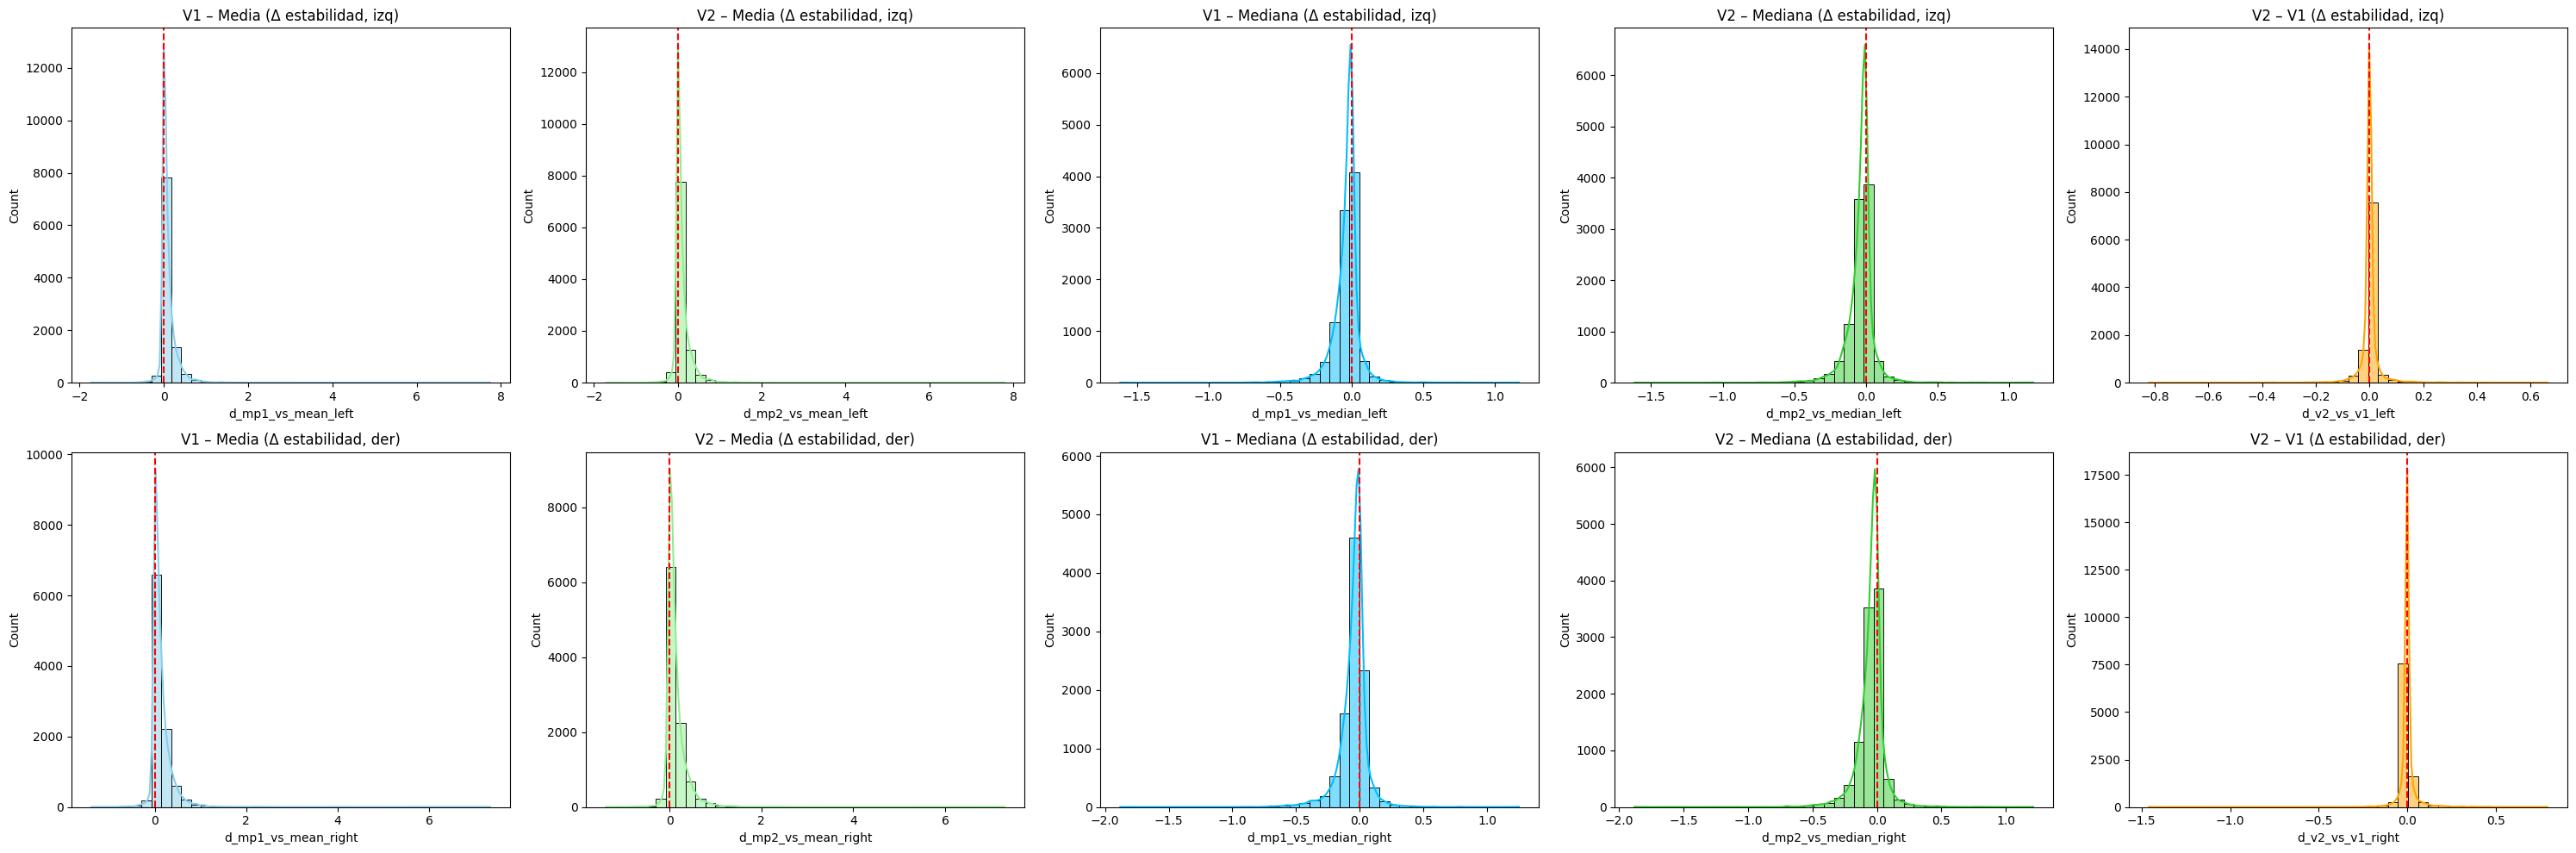

In [10]:
# --- 2. Histograma de mejoras directas bajo recorte unilateral ---
fig, axes = plt.subplots(2, 5, figsize=(30, 10))

# Izquierda
sns.histplot(df_ab["d_mp1_vs_mean_left"], bins=40, kde=True, ax=axes[0,0], color="skyblue")
axes[0,0].axvline(0, color="red", linestyle="--")
axes[0,0].set_title("V1 – Media (Δ estabilidad, izq)")

sns.histplot(df_ab["d_mp2_vs_mean_left"], bins=40, kde=True, ax=axes[0,1], color="lightgreen")
axes[0,1].axvline(0, color="red", linestyle="--")
axes[0,1].set_title("V2 – Media (Δ estabilidad, izq)")

sns.histplot(df_ab["d_mp1_vs_median_left"], bins=40, kde=True, ax=axes[0,2], color="deepskyblue")
axes[0,2].axvline(0, color="red", linestyle="--")
axes[0,2].set_title("V1 – Mediana (Δ estabilidad, izq)")

sns.histplot(df_ab["d_mp2_vs_median_left"], bins=40, kde=True, ax=axes[0,3], color="limegreen")
axes[0,3].axvline(0, color="red", linestyle="--")
axes[0,3].set_title("V2 – Mediana (Δ estabilidad, izq)")

sns.histplot(df_ab["d_v2_vs_v1_left"], bins=40, kde=True, ax=axes[0,4], color="orange")
axes[0,4].axvline(0, color="red", linestyle="--")
axes[0,4].set_title("V2 – V1 (Δ estabilidad, izq)")

# Derecha
sns.histplot(df_ab["d_mp1_vs_mean_right"], bins=40, kde=True, ax=axes[1,0], color="skyblue")
axes[1,0].axvline(0, color="red", linestyle="--")
axes[1,0].set_title("V1 – Media (Δ estabilidad, der)")

sns.histplot(df_ab["d_mp2_vs_mean_right"], bins=40, kde=True, ax=axes[1,1], color="lightgreen")
axes[1,1].axvline(0, color="red", linestyle="--")
axes[1,1].set_title("V2 – Media (Δ estabilidad, der)")

sns.histplot(df_ab["d_mp1_vs_median_right"], bins=40, kde=True, ax=axes[1,2], color="deepskyblue")
axes[1,2].axvline(0, color="red", linestyle="--")
axes[1,2].set_title("V1 – Mediana (Δ estabilidad, der)")

sns.histplot(df_ab["d_mp2_vs_median_right"], bins=40, kde=True, ax=axes[1,3], color="limegreen")
axes[1,3].axvline(0, color="red", linestyle="--")
axes[1,3].set_title("V2 – Mediana (Δ estabilidad, der)")

sns.histplot(df_ab["d_v2_vs_v1_right"], bins=40, kde=True, ax=axes[1,4], color="orange")
axes[1,4].axvline(0, color="red", linestyle="--")
axes[1,4].set_title("V2 – V1 (Δ estabilidad, der)")

plt.tight_layout()
plt.show()


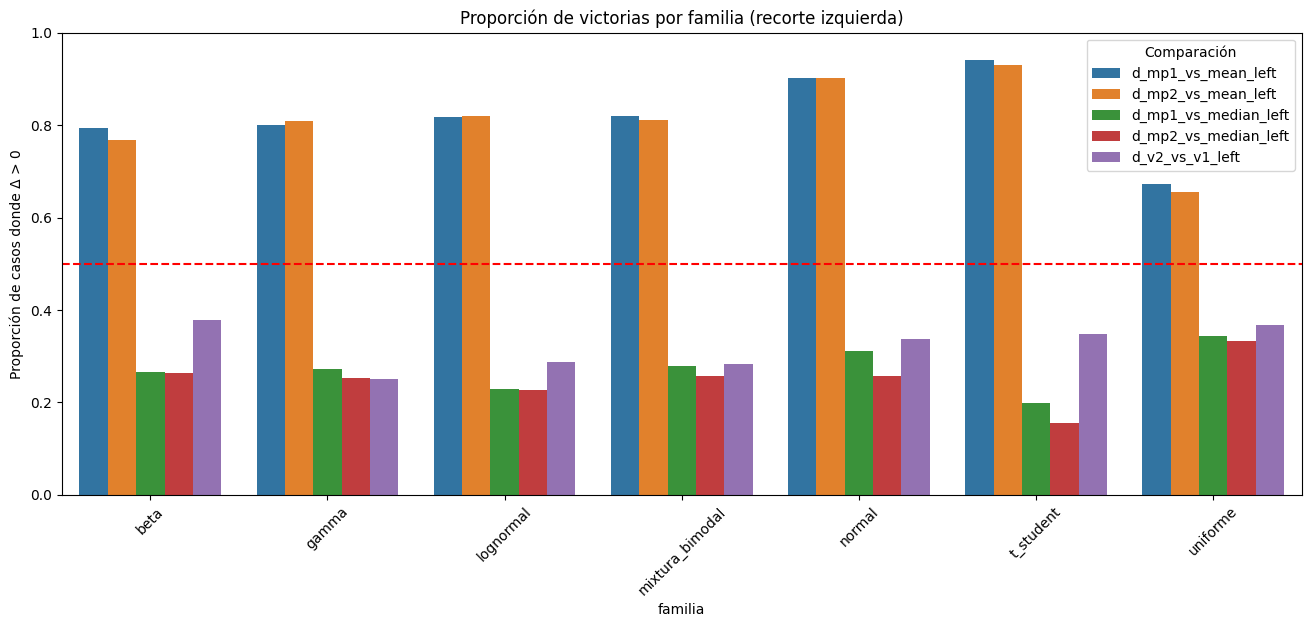

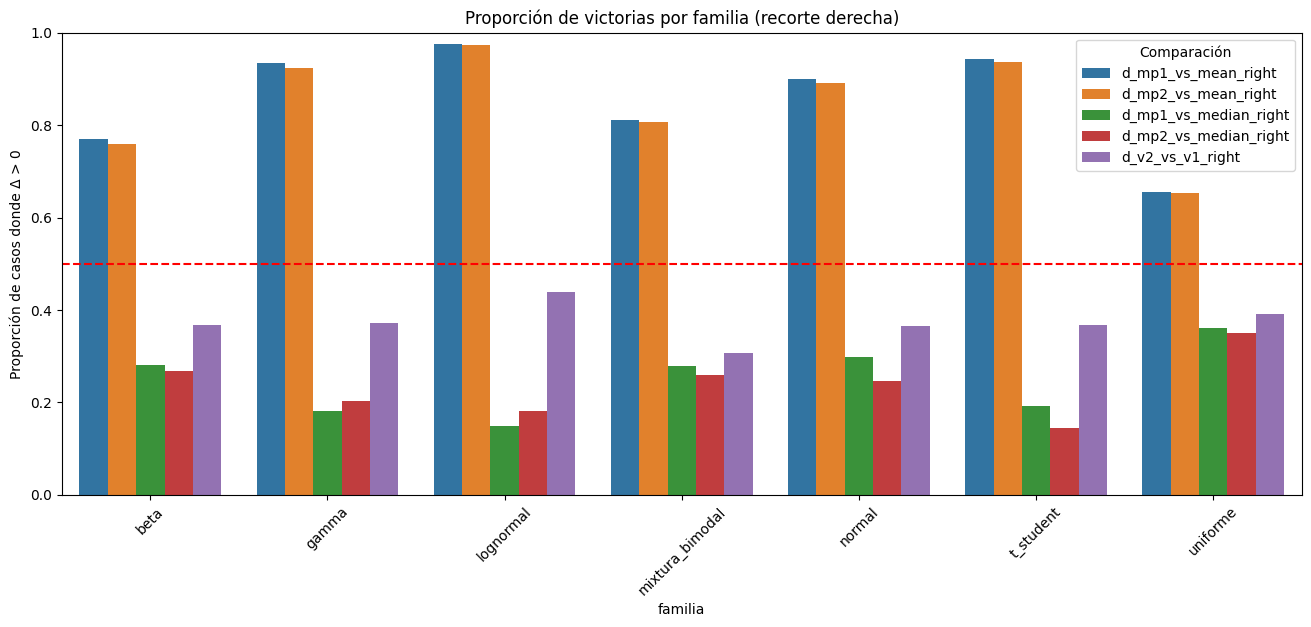

In [11]:
# --- 3. Proporciones de victorias por familia bajo recorte unilateral ---
cols_diffs_left = ["d_mp1_vs_mean_left", "d_mp2_vs_mean_left", "d_mp1_vs_median_left", "d_mp2_vs_median_left", "d_v2_vs_v1_left"]
cols_diffs_right = ["d_mp1_vs_mean_right", "d_mp2_vs_mean_right", "d_mp1_vs_median_right", "d_mp2_vs_median_right", "d_v2_vs_v1_right"]

prop_fam_left = (
    df_ab.groupby("familia")[cols_diffs_left]
         .apply(lambda g: (g > 0).mean())
         .reset_index()
         .melt(id_vars="familia", var_name="comparacion", value_name="prop_victorias")
)
prop_fam_right = (
    df_ab.groupby("familia")[cols_diffs_right]
         .apply(lambda g: (g > 0).mean())
         .reset_index()
         .melt(id_vars="familia", var_name="comparacion", value_name="prop_victorias")
)

plt.figure(figsize=(16, 6))
sns.barplot(data=prop_fam_left, x="familia", y="prop_victorias", hue="comparacion")
plt.axhline(0.5, color="red", linestyle="--")
plt.title("Proporción de victorias por familia (recorte izquierda)")
plt.ylabel("Proporción de casos donde Δ > 0")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title="Comparación")
plt.show()

plt.figure(figsize=(16, 6))
sns.barplot(data=prop_fam_right, x="familia", y="prop_victorias", hue="comparacion")
plt.axhline(0.5, color="red", linestyle="--")
plt.title("Proporción de victorias por familia (recorte derecha)")
plt.ylabel("Proporción de casos donde Δ > 0")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title="Comparación")
plt.show()


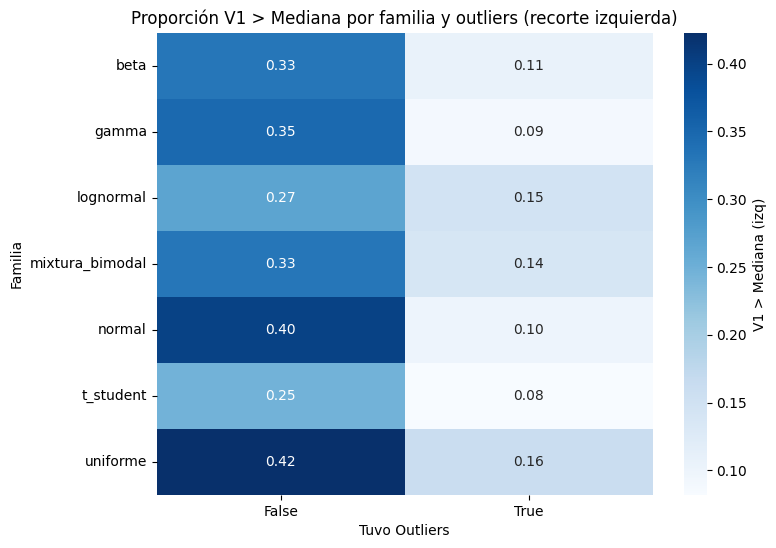

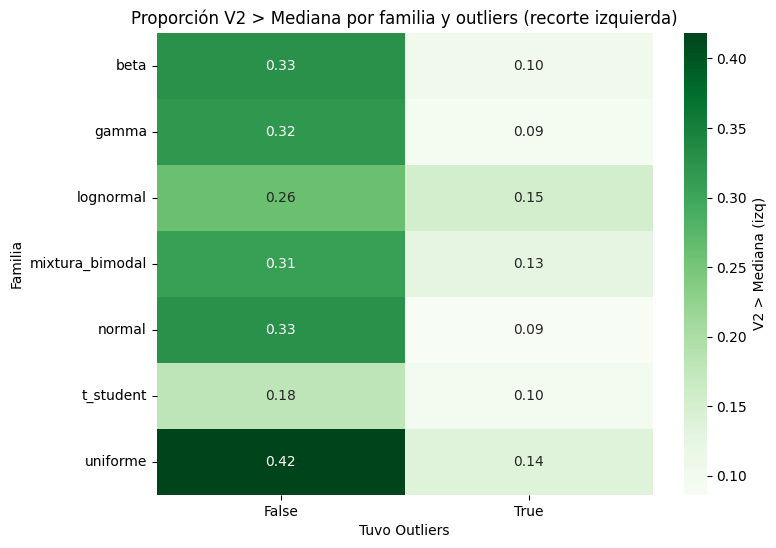

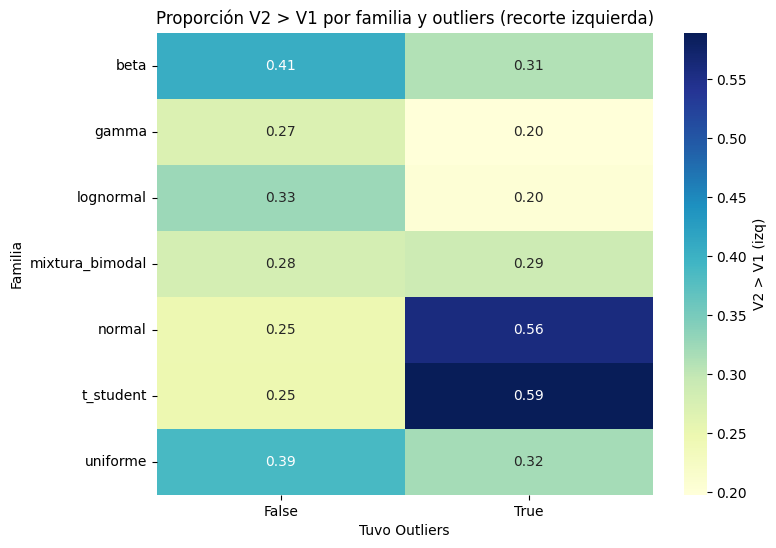

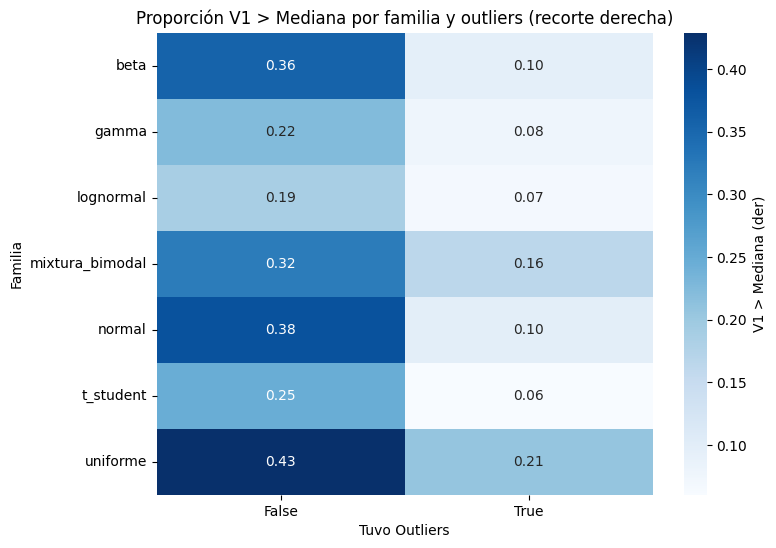

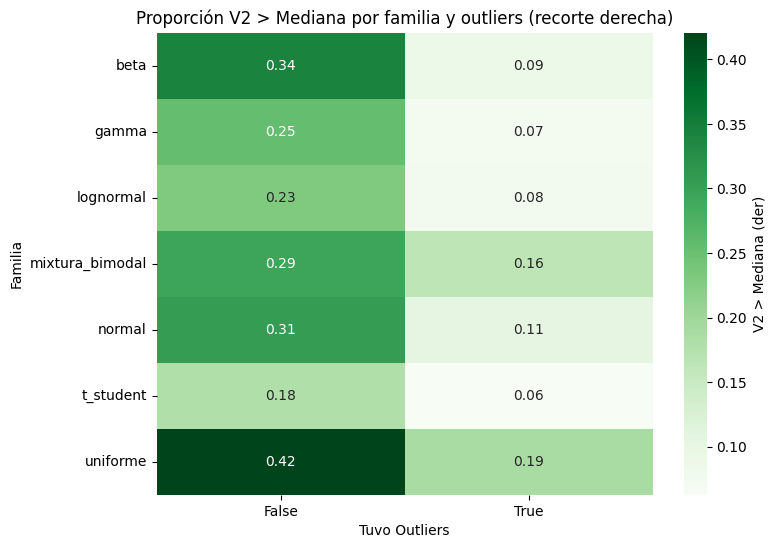

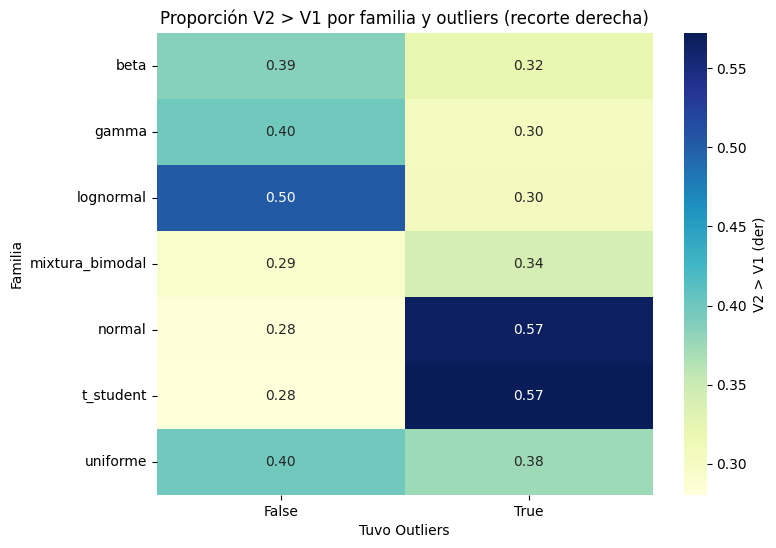

In [12]:
# --- 4. Heatmap de victorias por (familia x outliers) bajo recorte unilateral ---
heat_data_left_v1_median = (
    df_ab.groupby(["familia", "tuvo_outliers"])["d_mp1_vs_median_left"]
         .apply(lambda x: (x > 0).mean())
         .unstack()
)
heat_data_left_v2_median = (
    df_ab.groupby(["familia", "tuvo_outliers"])["d_mp2_vs_median_left"]
         .apply(lambda x: (x > 0).mean())
         .unstack()
)
heat_data_left_v2_v1 = (
    df_ab.groupby(["familia", "tuvo_outliers"])["d_v2_vs_v1_left"]
         .apply(lambda x: (x > 0).mean())
         .unstack()
)

heat_data_right_v1_median = (
    df_ab.groupby(["familia", "tuvo_outliers"])["d_mp1_vs_median_right"]
         .apply(lambda x: (x > 0).mean())
         .unstack()
)
heat_data_right_v2_median = (
    df_ab.groupby(["familia", "tuvo_outliers"])["d_mp2_vs_median_right"]
         .apply(lambda x: (x > 0).mean())
         .unstack()
)
heat_data_right_v2_v1 = (
    df_ab.groupby(["familia", "tuvo_outliers"])["d_v2_vs_v1_right"]
         .apply(lambda x: (x > 0).mean())
         .unstack()
)

plt.figure(figsize=(8, 6))
sns.heatmap(heat_data_left_v1_median, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'V1 > Mediana (izq)'})
plt.title("Proporción V1 > Mediana por familia y outliers (recorte izquierda)")
plt.ylabel("Familia")
plt.xlabel("Tuvo Outliers")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(heat_data_left_v2_median, annot=True, fmt=".2f", cmap="Greens", cbar_kws={'label': 'V2 > Mediana (izq)'})
plt.title("Proporción V2 > Mediana por familia y outliers (recorte izquierda)")
plt.ylabel("Familia")
plt.xlabel("Tuvo Outliers")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(heat_data_left_v2_v1, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'V2 > V1 (izq)'})
plt.title("Proporción V2 > V1 por familia y outliers (recorte izquierda)")
plt.ylabel("Familia")
plt.xlabel("Tuvo Outliers")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(heat_data_right_v1_median, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'V1 > Mediana (der)'})
plt.title("Proporción V1 > Mediana por familia y outliers (recorte derecha)")
plt.ylabel("Familia")
plt.xlabel("Tuvo Outliers")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(heat_data_right_v2_median, annot=True, fmt=".2f", cmap="Greens", cbar_kws={'label': 'V2 > Mediana (der)'})
plt.title("Proporción V2 > Mediana por familia y outliers (recorte derecha)")
plt.ylabel("Familia")
plt.xlabel("Tuvo Outliers")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(heat_data_right_v2_v1, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'V2 > V1 (der)'})
plt.title("Proporción V2 > V1 por familia y outliers (recorte derecha)")
plt.ylabel("Familia")
plt.xlabel("Tuvo Outliers")
plt.show()


### **Resumen de significancia estadística**

A continuación se muestra un cuadro resumen de los resultados de los tests Wilcoxon (unilateral, alternativa 'greater') para cada comparación y tipo de recorte. Se considera que una métrica es estadísticamente superior si el p-valor < 0.05.


In [13]:
# Cuadro resumen de significancia estadística

# Combinar los resultados de los tests
tests_all = pd.concat([
    df_tests_left.assign(recorte="izquierda"),
    df_tests_right.assign(recorte="derecha")
], ignore_index=True)

# Determinar si la métrica es estadísticamente superior (p < 0.05)
tests_all["significativo"] = tests_all["p_value"] < 0.05

# Añadir prueba V1 vs V2 (Wilcoxon unilateral, alternativa 'greater')
comparisons_left_v1_vs_v2 = [("d_v1_vs_v2_left", "V1 vs V2 (izq)")]
comparisons_right_v1_vs_v2 = [("d_v1_vs_v2_right", "V1 vs V2 (der)")]

df_tests_left_v1_vs_v2 = run_tests(df_ab, comparisons_left_v1_vs_v2, alternative="greater")
df_tests_right_v1_vs_v2 = run_tests(df_ab, comparisons_right_v1_vs_v2, alternative="greater")

# Unir los nuevos resultados
tests_all_v1_vs_v2 = pd.concat([
    df_tests_left_v1_vs_v2.assign(recorte="izquierda"),
    df_tests_right_v1_vs_v2.assign(recorte="derecha")
], ignore_index=True)
tests_all_v1_vs_v2["significativo"] = tests_all_v1_vs_v2["p_value"] < 0.05

# Concatenar ambos resultados
tests_all_total = pd.concat([tests_all, tests_all_v1_vs_v2], ignore_index=True)

# Cuadro pivote
cuadro = tests_all_total.pivot_table(
    index=["comparacion"],
    columns="recorte",
    values="significativo",
    aggfunc="first"
    )

# Mostrar el cuadro resumen
print("Cuadro resumen de significancia (True = superior estadísticamente, p < 0.05):")
display(cuadro)

Cuadro resumen de significancia (True = superior estadísticamente, p < 0.05):


recorte,derecha,izquierda
comparacion,,
V1 vs Media (der),True,NaN
V1 vs Media (izq),NaN,True
V1 vs Mediana (der),False,NaN
V1 vs Mediana (izq),NaN,False
V1 vs V2 (der),False,NaN
V1 vs V2 (izq),NaN,False
V2 vs Media (der),True,NaN
V2 vs Media (izq),NaN,True
V2 vs Mediana (der),False,NaN


## **Conclusiones de prueba de estabilidad por recortes**
Ambas métricas (V1 y V2) resultan significativamente más estables que el promedio ante recortes de colas por ambos lados en toda clase de distribuciones, no resultan más estables que la mediana debido a que la mediana es inherentemente estable ante recortes de datos, a menos que el recorte sea tan grande como para modificar el dato mediano. Por ello, la comparación de estabilidad propuesta no es ideal para comparar el desempeño de la métrica vs la mediana. 

# **Comparaciones métrica V1 vs. V2**

Se busca evidencia sobre un mejor desempeño de alguna de las métricas controlando por familias de distribuciones.

In [14]:
# Diagnóstico de estabilidad V1 vs V2 por familia distributiva

# Crear un DataFrame para almacenar los resultados
resultados_familia = []

for fam, grupo in df_ab.groupby("familia"):
    # Diferencia de estabilidad V1 - V2 bajo recorte izquierdo
    dif_left = grupo["delta_mp1_left"] - grupo["delta_mp2_left"]
    stat_left, p_left = wilcoxon(dif_left, alternative="greater")
    
    # Diferencia de estabilidad V1 - V2 bajo recorte derecho
    dif_right = grupo["delta_mp1_right"] - grupo["delta_mp2_right"]
    stat_right, p_right = wilcoxon(dif_right, alternative="greater")
    
    resultados_familia.append({
        "familia": fam,
        "n": len(grupo),
        "mean_diff_left": dif_left.mean(),
        "wilcoxon_stat_left": stat_left,
        "p_value_left": p_left,
        "mean_diff_right": dif_right.mean(),
        "wilcoxon_stat_right": stat_right,
        "p_value_right": p_right
    })

df_diagnostico_familia = pd.DataFrame(resultados_familia)

# Mostrar resultados
print("Diagnóstico de estabilidad V1 vs V2 por familia distributiva")
display(df_diagnostico_familia)

# marcar si V1 es significativamente más estable que V2 (p < 0.05)
df_diagnostico_familia["V1_mas_estable_izq"] = df_diagnostico_familia["p_value_left"] < 0.05
df_diagnostico_familia["V1_mas_estable_der"] = df_diagnostico_familia["p_value_right"] < 0.05

display(df_diagnostico_familia[["familia", "V1_mas_estable_izq", "V1_mas_estable_der"]])

Diagnóstico de estabilidad V1 vs V2 por familia distributiva


,familia,n,mean_diff_left,wilcoxon_stat_left,p_value_left,mean_diff_right,wilcoxon_stat_right,p_value_right
0,beta,1447,0.001670,381377.5,0.298849,0.000621,363135.5,6.410618e-01
1,gamma,1452,0.002439,293262.5,1.000000,0.006762,426667.5,3.338804e-01
2,lognormal,1428,-0.001238,260851.0,1.000000,0.014845,453764.5,4.161220e-11
3,mixtura_bimodal,1450,-0.002761,294904.0,0.999999,0.000428,322608.5,9.861793e-01
4,normal,1454,-0.000879,395445.5,0.998699,0.000532,441873.5,8.009370e-01
5,t_student,1402,-0.000436,365334.0,0.995983,-0.000045,363763.0,9.868403e-01
6,uniforme,1367,-0.001961,256159.0,0.984555,0.000419,274265.0,5.445171e-01


,familia,V1_mas_estable_izq,V1_mas_estable_der
0,beta,False,False
1,gamma,False,False
2,lognormal,False,True
3,mixtura_bimodal,False,False
4,normal,False,False
5,t_student,False,False
6,uniforme,False,False


In [15]:
# Diagnóstico de estabilidad V2 vs V1 por familia distributiva (prueba invertida)

resultados_familia_v2 = []

for fam, grupo in df_ab.groupby("familia"):
    # Diferencia de estabilidad V2 - V1 bajo recorte izquierdo
    dif_left = grupo["delta_mp2_left"] - grupo["delta_mp1_left"]
    stat_left, p_left = wilcoxon(dif_left, alternative="greater")
    
    # Diferencia de estabilidad V2 - V1 bajo recorte derecho
    dif_right = grupo["delta_mp2_right"] - grupo["delta_mp1_right"]
    stat_right, p_right = wilcoxon(dif_right, alternative="greater")
    
    resultados_familia_v2.append({
        "familia": fam,
        "n": len(grupo),
        "mean_diff_left": dif_left.mean(),
        "wilcoxon_stat_left": stat_left,
        "p_value_left": p_left,
        "mean_diff_right": dif_right.mean(),
        "wilcoxon_stat_right": stat_right,
        "p_value_right": p_right
    })

# Crear DataFrame y mostrar resultados

df_diagnostico_familia_v2 = pd.DataFrame(resultados_familia_v2)

print("Diagnóstico de estabilidad V2 vs V1 por familia distributiva (prueba invertida)")
display(df_diagnostico_familia_v2)

# Opcional: marcar si V2 es significativamente más estable que V1 (p < 0.05)
df_diagnostico_familia_v2["V2_mas_estable_izq"] = df_diagnostico_familia_v2["p_value_left"] < 0.05
df_diagnostico_familia_v2["V2_mas_estable_der"] = df_diagnostico_familia_v2["p_value_right"] < 0.05

display(df_diagnostico_familia_v2[["familia", "V2_mas_estable_izq", "V2_mas_estable_der"]])

Diagnóstico de estabilidad V2 vs V1 por familia distributiva (prueba invertida)


,familia,n,mean_diff_left,wilcoxon_stat_left,p_value_left,mean_diff_right,wilcoxon_stat_right,p_value_right
0,beta,1447,-0.001670,368322.5,7.011514e-01,-0.000621,371942.5,0.358938
1,gamma,1452,-0.002439,503690.5,2.238908e-16,-0.006762,415085.5,0.666120
2,lognormal,1428,0.001238,378164.0,4.504206e-08,-0.014845,293488.5,1.000000
3,mixtura_bimodal,1450,0.002761,406616.0,1.035698e-06,-0.000428,374181.5,0.013821
4,normal,1454,0.000879,479057.5,1.301201e-03,-0.000532,466004.5,0.199063
5,t_student,1402,0.000436,434146.0,4.017273e-03,0.000045,420615.0,0.013160
6,uniforme,1367,0.001961,298772.0,1.544470e-02,-0.000419,276460.0,0.455483


,familia,V2_mas_estable_izq,V2_mas_estable_der
0,beta,False,False
1,gamma,True,False
2,lognormal,True,False
3,mixtura_bimodal,True,True
4,normal,True,False
5,t_student,True,True
6,uniforme,True,False


# **Conclusiones: prueba V1 vs. V2**

